# Analysis Examples
## A Guide to the National Structure Inventory (NSI) API in Python
Author: Mark Bauer

This notebook is intended to demonstrate how to use the National Structure Inventory (NSI) API in Python. To learn more about the NSI API, please visit the [API Reference Guide](https://www.hec.usace.army.mil/confluence/nsi/technicalreferences/latest/api-reference-guide) and the [NSI Documentation](https://www.hec.usace.army.mil/confluence/nsi).

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd
import seaborn as sns

For the FIPS code argument, we will use Manhattan borough - **36061**.

# National Structure Inventory (NSI) API

# Structures Endpoint
> The structures endpoint provides structure data to the user as a geojson feature collection (fc) or a feature stream (fs), the default is feature collection. The structure of a feature returned by the API can be seen in this geojson feature block. The type of return can be declared by the fmt directive (e.g. &fmt=fc)

Source: https://www.hec.usace.army.mil/confluence/nsi/technicalreferences/latest/api-reference-guide#id-.APIReferenceGuidev2022-Structures

## Structures By FIPS
FIPS codes: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt

We will use Manhattan's FIPS code: 36063.

In [2]:
root_url = "https://nsi.sec.usace.army.mil/nsiapi/"
structures = "structures?fips="
fips = "36061"

url = f"{root_url}{structures}{fips}"
df = pd.read_json(url)

print(df.shape)
df.head()

(163033, 2)


,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."


In [3]:
df = pd.json_normalize(df['features'])

print(df.shape)
df.head()

(163033, 32)


,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips,...,properties.val_vehic,properties.source,properties.med_yr_blt,properties.firmzone,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m
0,Feature,Point,"[-73.99841, 40.714656]",554079197,87G8P272+VJ8-1-1-2-1,RES3C,RES,W,B,360610029003003,...,135000,X,1939,None,0.25,0.03,-73.998410,40.714656,30.833406,9.398022
1,Feature,Point,"[-73.997441, 40.714627]",554079269,87G8P273+V23-2-5-3-4,RES3A,RES,M,S,360610029003004,...,27000,X,1939,None,0.25,0.03,-73.997441,40.714627,36.259209,11.051806
2,Feature,Point,"[-74.01107, 40.719515]",554096858,87G7PX9Q+RH3-1-1-1-1,IND6,IND,S,S,360610039002001,...,36000,X,1975,None,0.25,0.03,-74.011070,40.719515,9.820276,2.993220
3,Feature,Point,"[-73.997247, 40.721022]",554126006,87G8P2C3+C42-8-6-8-7,RES3A,RES,W,S,360610041006002,...,54000,X,1939,None,0.25,0.03,-73.997247,40.721022,32.165671,9.804096
4,Feature,Point,"[-73.984015, 40.718307]",554175328,87G8P298+89H-10-11-11-11,EDU1,PUB,S,S,360610014022000,...,234000,X,1959,None,0.25,0.03,-73.984015,40.718307,23.983126,7.310057


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163033 entries, 0 to 163032
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   type                     163033 non-null  object 
 1   geometry.type            163033 non-null  object 
 2   geometry.coordinates     163033 non-null  object 
 3   properties.fd_id         163033 non-null  int64  
 4   properties.bid           163033 non-null  object 
 5   properties.occtype       163033 non-null  object 
 6   properties.st_damcat     163033 non-null  object 
 7   properties.bldgtype      163033 non-null  object 
 8   properties.found_type    163033 non-null  object 
 9   properties.cbfips        163033 non-null  object 
 10  properties.pop2amu65     163033 non-null  int64  
 11  properties.pop2amo65     163033 non-null  int64  
 12  properties.pop2pmu65     163033 non-null  int64  
 13  properties.pop2pmo65     163033 non-null  int64  
 14  prop

In [5]:
df.isnull().sum().sort_values(ascending=False)

properties.firmzone        163033
properties.ftprntsrc       113100
type                            0
geometry.type                   0
properties.ground_elv           0
properties.y                    0
properties.x                    0
properties.u65disable           0
properties.o65disable           0
properties.med_yr_blt           0
properties.source               0
properties.val_vehic            0
properties.val_cont             0
properties.val_struct           0
properties.found_ht             0
properties.students             0
properties.ftprntid             0
properties.num_story            0
properties.sqft                 0
properties.pop2pmo65            0
properties.pop2pmu65            0
properties.pop2amo65            0
properties.pop2amu65            0
properties.cbfips               0
properties.found_type           0
properties.bldgtype             0
properties.st_damcat            0
properties.occtype              0
properties.bid                  0
properties.fd_

In [6]:
df.describe()

,properties.fd_id,properties.pop2amu65,properties.pop2amo65,properties.pop2pmu65,properties.pop2pmo65,properties.sqft,properties.num_story,properties.students,properties.found_ht,properties.val_struct,properties.val_cont,properties.val_vehic,properties.med_yr_blt,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m
count,1.630330e+05,163033.000000,163033.000000,163033.000000,163033.000000,1.630330e+05,163033.000000,163033.000000,163033.000000,1.630330e+05,1.630330e+05,1.630330e+05,163033.000000,163033.00,1.630330e+05,163033.000000,163033.000000,163033.000000,163033.000000
mean,5.549201e+08,8.408764,1.994860,17.918102,2.616617,5.226986e+03,2.221612,1.304061,1.696101,1.127928e+06,7.618989e+05,1.272350e+05,1956.942208,0.25,3.000000e-02,-73.976480,40.762143,46.371874,14.134147
std,5.671348e+05,34.395594,9.684798,142.679683,12.003926,1.756495e+04,8.957499,30.752780,1.768494,3.421964e+06,2.486419e+06,6.590770e+05,20.380739,0.00,2.081675e-17,0.021487,0.033172,32.366691,9.865367
min,5.540769e+08,0.000000,0.000000,0.000000,0.000000,1.467808e+01,1.000000,0.000000,0.500000,0.000000e+00,0.000000e+00,0.000000e+00,1939.000000,0.25,3.000000e-02,-74.047007,40.689244,-20.319334,-6.193333
25%,5.543870e+08,1.000000,0.000000,1.000000,0.000000,8.000000e+02,1.000000,0.000000,0.500000,2.220645e+05,1.148178e+05,2.700000e+04,1939.000000,0.25,3.000000e-02,-73.992305,40.737986,22.905384,6.981561
50%,5.548442e+08,1.000000,0.000000,1.000000,0.000000,1.343000e+03,1.000000,0.000000,1.500000,3.165476e+05,1.726090e+05,2.700000e+04,1949.000000,0.25,3.000000e-02,-73.978802,40.762367,37.809274,11.524266
75%,5.553810e+08,2.000000,1.000000,6.000000,1.000000,3.004000e+03,2.000000,0.000000,2.000000,6.430523e+05,4.625292e+05,2.700000e+04,1972.000000,0.25,3.000000e-02,-73.959425,40.781564,66.004915,20.118298
max,5.561127e+08,1739.000000,688.000000,18312.000000,1096.000000,1.655955e+06,591.000000,3288.000000,8.000000,3.502432e+08,2.291838e+08,9.034200e+07,2017.000000,0.25,3.000000e-02,-73.907464,40.879013,251.719540,76.724113


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163033 entries, 0 to 163032
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   type                     163033 non-null  object 
 1   geometry.type            163033 non-null  object 
 2   geometry.coordinates     163033 non-null  object 
 3   properties.fd_id         163033 non-null  int64  
 4   properties.bid           163033 non-null  object 
 5   properties.occtype       163033 non-null  object 
 6   properties.st_damcat     163033 non-null  object 
 7   properties.bldgtype      163033 non-null  object 
 8   properties.found_type    163033 non-null  object 
 9   properties.cbfips        163033 non-null  object 
 10  properties.pop2amu65     163033 non-null  int64  
 11  properties.pop2amo65     163033 non-null  int64  
 12  properties.pop2pmu65     163033 non-null  int64  
 13  properties.pop2pmo65     163033 non-null  int64  
 14  prop

In [8]:
df.iloc[:5, :10]

,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips
0,Feature,Point,"[-73.99841, 40.714656]",554079197,87G8P272+VJ8-1-1-2-1,RES3C,RES,W,B,360610029003003
1,Feature,Point,"[-73.997441, 40.714627]",554079269,87G8P273+V23-2-5-3-4,RES3A,RES,M,S,360610029003004
2,Feature,Point,"[-74.01107, 40.719515]",554096858,87G7PX9Q+RH3-1-1-1-1,IND6,IND,S,S,360610039002001
3,Feature,Point,"[-73.997247, 40.721022]",554126006,87G8P2C3+C42-8-6-8-7,RES3A,RES,W,S,360610041006002
4,Feature,Point,"[-73.984015, 40.718307]",554175328,87G8P298+89H-10-11-11-11,EDU1,PUB,S,S,360610014022000


In [9]:
df.iloc[:5, 10:20]

,properties.pop2amu65,properties.pop2amo65,properties.pop2pmu65,properties.pop2pmo65,properties.sqft,properties.num_story,properties.ftprntid,properties.ftprntsrc,properties.students,properties.found_ht
0,78,25,45,25,3000.000,1,36061_2107,MBL,0,0.5
1,88,24,43,24,1813.608,2,36061_2142,MBL,0,0.5
2,1,0,6,1,10000.000,1,36061_4177,MBL,0,0.5
3,87,16,34,16,3301.125,1,36061_7823,MBL,0,0.5
4,2,0,40,1,29057.000,1,36061_13703,MBL,0,0.5


In [10]:
df.iloc[:5, 20:]

,properties.val_struct,properties.val_cont,properties.val_vehic,properties.source,properties.med_yr_blt,properties.firmzone,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m
0,748866.702,374433.351,135000,X,1939,None,0.25,0.03,-73.998410,40.714656,30.833406,9.398022
1,461254.616,230627.308,27000,X,1939,None,0.25,0.03,-73.997441,40.714627,36.259209,11.051806
2,1027723.520,1027723.520,36000,X,1975,None,0.25,0.03,-74.011070,40.719515,9.820276,2.993220
3,818059.354,409029.677,54000,X,1939,None,0.25,0.03,-73.997247,40.721022,32.165671,9.804096
4,5813544.000,5813544.000,234000,X,1959,None,0.25,0.03,-73.984015,40.718307,23.983126,7.310057


In [11]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['properties.x'], df['properties.y']),
    crs="EPSG:4326"
)

print(gdf.crs)
gdf.head()

EPSG:4326


,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips,...,properties.source,properties.med_yr_blt,properties.firmzone,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m,geometry
0,Feature,Point,"[-73.99841, 40.714656]",554079197,87G8P272+VJ8-1-1-2-1,RES3C,RES,W,B,360610029003003,...,X,1939,None,0.25,0.03,-73.998410,40.714656,30.833406,9.398022,POINT (-73.99841 40.71466)
1,Feature,Point,"[-73.997441, 40.714627]",554079269,87G8P273+V23-2-5-3-4,RES3A,RES,M,S,360610029003004,...,X,1939,None,0.25,0.03,-73.997441,40.714627,36.259209,11.051806,POINT (-73.99744 40.71463)
2,Feature,Point,"[-74.01107, 40.719515]",554096858,87G7PX9Q+RH3-1-1-1-1,IND6,IND,S,S,360610039002001,...,X,1975,None,0.25,0.03,-74.011070,40.719515,9.820276,2.993220,POINT (-74.01107 40.71952)
3,Feature,Point,"[-73.997247, 40.721022]",554126006,87G8P2C3+C42-8-6-8-7,RES3A,RES,W,S,360610041006002,...,X,1939,None,0.25,0.03,-73.997247,40.721022,32.165671,9.804096,POINT (-73.99725 40.72102)
4,Feature,Point,"[-73.984015, 40.718307]",554175328,87G8P298+89H-10-11-11-11,EDU1,PUB,S,S,360610014022000,...,X,1959,None,0.25,0.03,-73.984015,40.718307,23.983126,7.310057,POINT (-73.98401 40.71831)


<AxesSubplot: >

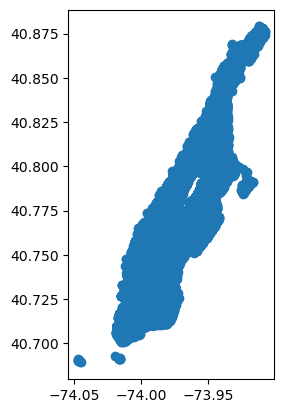

In [12]:
gdf.plot()

In [13]:
df['properties.source'].value_counts()

P    148355
E     11773
X      2348
S       499
N        30
H        28
Name: properties.source, dtype: int64

In [14]:
df['properties.ftprntsrc'].value_counts()

MBL     48460
NGA      1030
Bing      274
ORNL      169
Name: properties.ftprntsrc, dtype: int64

In [15]:
df['properties.bldgtype'].value_counts()

W    58570
C    54053
S    28392
M    22012
H        6
Name: properties.bldgtype, dtype: int64

In [16]:
df['properties.occtype'].value_counts().head(10)

RES1-1SWB    41416
RES1-1SNB    21765
RES1-2SWB    16621
COM1         11131
RES1-2SNB     9072
COM4          8129
RES1-3SWB     6620
IND2          5071
RES3E         5069
RES4          4564
Name: properties.occtype, dtype: int64

# Analyzing Foundation Type

In [17]:
df['properties.found_type'].value_counts()

B    80023
S    55515
C    16659
I     8429
P     1745
W      662
Name: properties.found_type, dtype: int64

<AxesSubplot: >

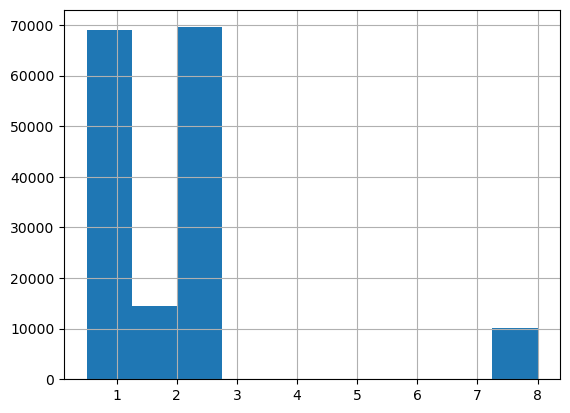

In [18]:
df['properties.found_ht'].hist()

<AxesSubplot: >

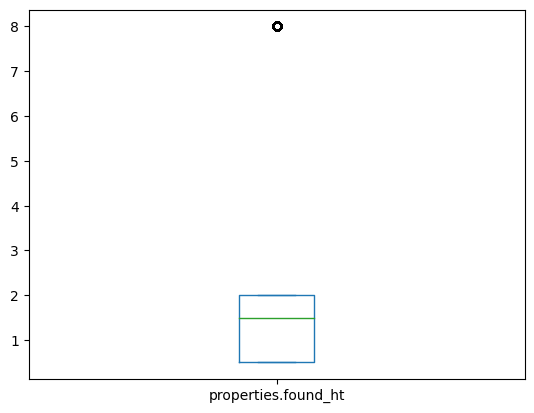

In [19]:
df['properties.found_ht'].plot.box()

In [20]:
df['properties.found_ht'].value_counts()

2.0    69536
0.5    68928
1.5    14395
8.0    10174
Name: properties.found_ht, dtype: int64

<AxesSubplot: xlabel='properties.found_ht', ylabel='count'>

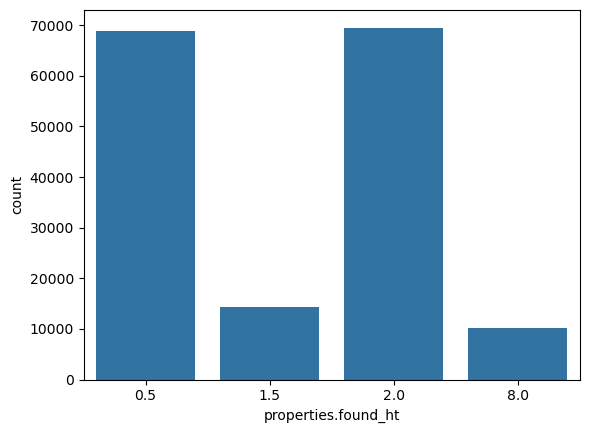

In [21]:
sns.countplot(data=df, x='properties.found_ht', color="C0")

<AxesSubplot: xlabel='properties.found_type', ylabel='properties.found_ht'>

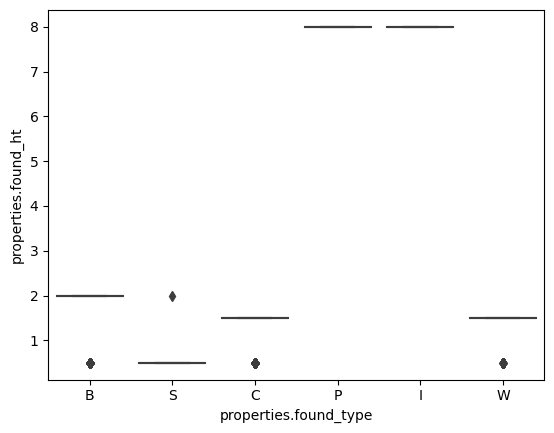

In [22]:
sns.boxplot(
    data=df,
    x="properties.found_type",
    y="properties.found_ht"
)

<AxesSubplot: xlabel='properties.bldgtype', ylabel='properties.found_ht'>

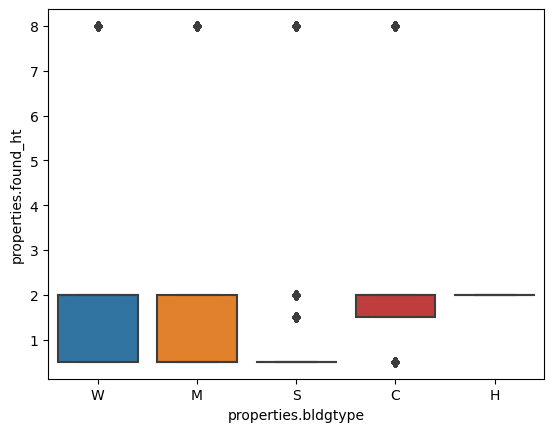

In [23]:
sns.boxplot(
    data=df,
    x="properties.bldgtype",
    y="properties.found_ht"
)

<AxesSubplot: xlabel='properties.ground_elv', ylabel='properties.found_ht'>

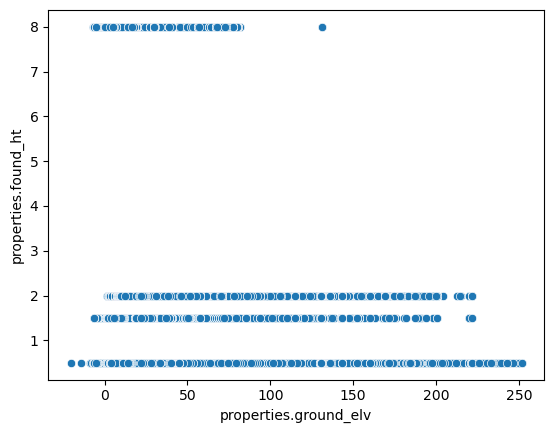

In [24]:
sns.scatterplot(
    data=df,
    x="properties.ground_elv",
    y="properties.found_ht"
)

<AxesSubplot: xlabel='properties.sqft', ylabel='properties.found_ht'>

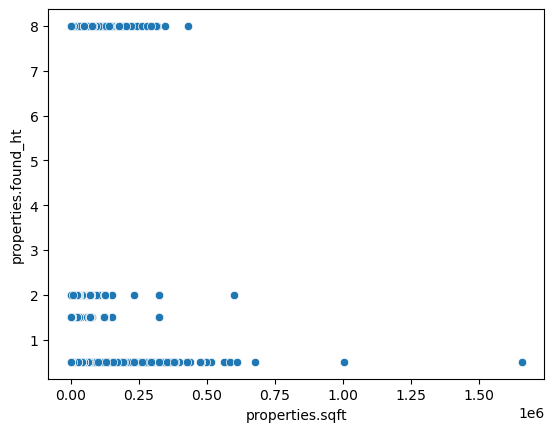

In [25]:
sns.scatterplot(
    data=df,
    x="properties.sqft",
    y="properties.found_ht"
)

<AxesSubplot: xlabel='properties.num_story', ylabel='properties.found_ht'>

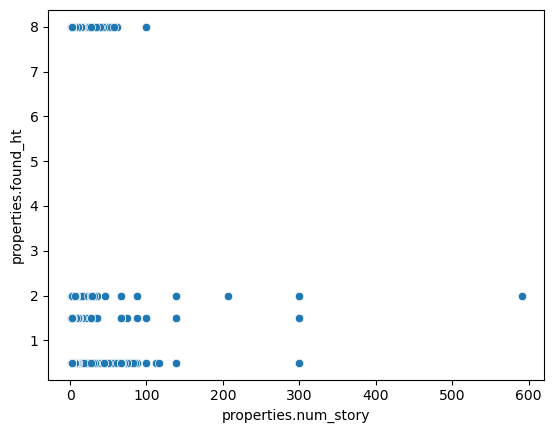

In [26]:
sns.scatterplot(
    data=df,
    x="properties.num_story",
    y="properties.found_ht"
)

<AxesSubplot: xlabel='properties.val_struct', ylabel='properties.found_ht'>

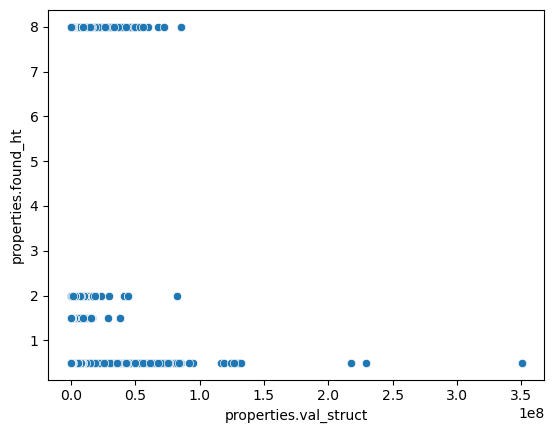

In [27]:
sns.scatterplot(
    data=df,
    x="properties.val_struct",
    y="properties.found_ht"
)

<AxesSubplot: xlabel='properties.val_cont', ylabel='properties.found_ht'>

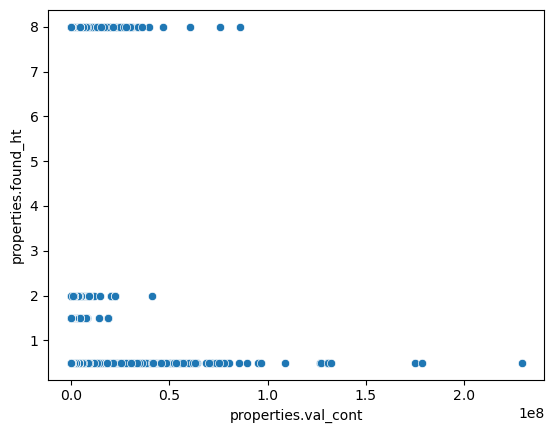

In [28]:
sns.scatterplot(
    data=df,
    x="properties.val_cont",
    y="properties.found_ht"
)